# Decision Trees

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, tree
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

簡易的 決策樹 實驗

使用 Iris dataset

https://zh.wikipedia.org/wiki/安德森鸢尾花卉数据集


In [2]:
 # windows only hack for graphviz path 
import os
for path in os.environ['PATH'].split(os.pathsep):
    if path.endswith("Library\\bin"):
        os.environ['PATH']+=os.pathsep+os.path.join(path, 'graphviz')

In [3]:
# Iris dataset
iris  = datasets.load_iris()
X, y = iris.data, iris.target
clf=tree.DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
iris_feature_names = ["花萼長度", "花萼寬度", "花瓣長度","花瓣寬度"]
iris_target_names = ["山鳶尾", "變色鳶尾", "維吉尼亞鳶尾"]

dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=iris_feature_names,  
                         class_names=iris_target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

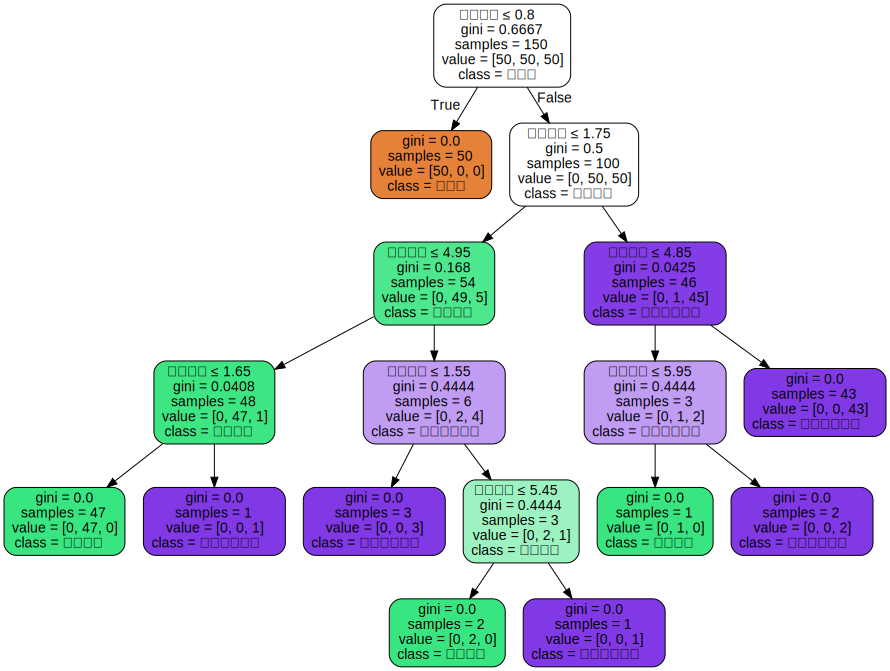

In [5]:
import pydot_ng as pydot
from IPython.display import SVG
SVG(pydot.graph_from_dot_data(dot_data).create_svg())

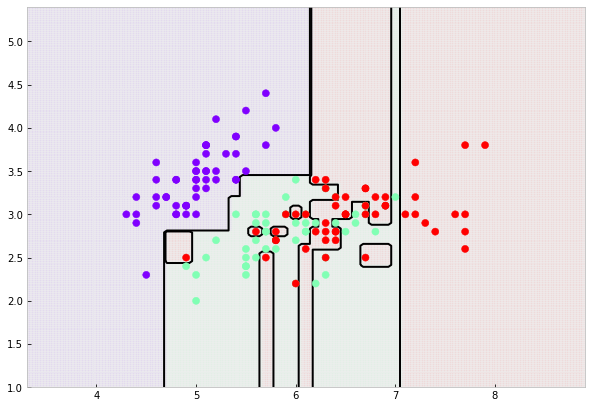

In [6]:
# 只取 X 的兩個 features
X = iris.data[:, [0, 1]]

clf.fit(X, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 logistic 的預測
Z = clf.predict(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# 畫出顏色和邊界
plt.pcolormesh(grid[0], grid[1], Z, cmap=plt.cm.rainbow, alpha=0.02)
plt.contour(grid[0], grid[1], Z, colors=['k', 'k', 'k'], linestyles=['-', '-', '-'],
                levels=[0, 1, 2])

# 標出 sample 點
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);

## Q
* 不同的設定
* 不同的圖
* 參考 http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py

## MNIST

In [7]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
train_X = pca.fit_transform(train_set[0])
test_X = pca.transform(test_set[0])

# use only first 10000 samples
#idx = np.random.choice(np.arange(train_X.shape[0]), 30000, replace=False)
#train_X = train_X[idx]
#train_y = train_y[idx]

In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
%%timeit -n 1 -r 1
clf.fit(train_X, train_y)

1 loop, best of 1: 8.21 s per loop


In [10]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(train_X) == train_y))

1.0
1 loop, best of 1: 22.6 ms per loop


In [11]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(test_X) == test_y))

0.8343
1 loop, best of 1: 4.54 ms per loop


## Q
* 不用 PCA, 直接從圖片像素
* 縮小圖片

In [12]:
%%timeit -n 1 -r 1
%run -i q_dtree_halfsize.py

train: 1.0
test: 0.8822
1 loop, best of 1: 6.92 s per loop
